In [54]:
import funpymodeling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from funpymodeling.exploratory import freq_tbl

In [55]:
mr=pd.read_csv('microretailer_mit_lift_lab.csv')

In [56]:
mr.head()

,_record_id,_title,_server_updated_at,_updated_by,_geometry,_latitude,_longitude,228_store_name,229_store_picture,232_type_of_store,...,261_technology_organization,262_technology_serve_customers,263_technology_secure_sales,264_technology_budget,267_technology_investment_customer_preferences,234_willingness_participate_workshop,318_shopkeeper_name,319_shopkeepers_last_name,236_whatsapp,235_email
0,dff2998e-af74-4de6-8efd-488aca24e67b,"November 12, 2022",2022-11-12 22:15:10 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.233822273 19.0535362706),19.053536,-98.233822,Eugene’s Compostura,1 Photo,Tailor,...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
1,c596412f-4fc2-4983-acba-d9565859e42f,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2341421351 19.0535610353),19.053561,-98.234142,Frutas y verduras Angy,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
2,5bb632b3-41b5-4fb6-a817-b564e8b45a48,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.232299887 19.058654656),19.058655,-98.232300,Libélula,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
3,6774a0f6-bab4-4a58-bf94-95ad0b7cb438,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2331576513 19.0592929035),19.059293,-98.233158,Quality fix,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
4,6cc637fa-3d54-48c7-9499-6de13d0a26aa,"November 12, 2022",2022-11-12 22:15:08 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2338639604 19.0595846029),19.059585,-98.233864,Artesanías Los Pinos,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN


In [57]:
mr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Columns: 106 entries, _record_id to 235_email
dtypes: float64(23), int64(2), object(81)
memory usage: 141.7+ KB


***Valores Nulos***

Los identificamos y vemos de qué clase son para escoger nuestro método de sustitución

In [58]:
vn=mr.isnull().sum()
vn

_record_id                                0
_title                                    0
_server_updated_at                        0
_updated_by                               0
_geometry                                 0
                                       ... 
234_willingness_participate_workshop     73
318_shopkeeper_name                     123
319_shopkeepers_last_name               125
236_whatsapp                            129
235_email                               142
Length: 106, dtype: int64

In [59]:
mr1=mr.fillna(method='bfill')

/var/folders/19/7c2smbhs6b3g5ffy1ph3r__m0000gn/T/ipykernel_82735/603748063.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  mr1=mr.fillna(method='bfill')


In [60]:
vn=mr1.isnull().sum()
vn

_record_id                              0
_title                                  0
_server_updated_at                      0
_updated_by                             0
_geometry                               0
                                       ..
234_willingness_participate_workshop    5
318_shopkeeper_name                     5
319_shopkeepers_last_name               5
236_whatsapp                            5
235_email                               5
Length: 106, dtype: int64

In [61]:
mr2=mr1.fillna("0")
mr2

,_record_id,_title,_server_updated_at,_updated_by,_geometry,_latitude,_longitude,228_store_name,229_store_picture,232_type_of_store,...,261_technology_organization,262_technology_serve_customers,263_technology_secure_sales,264_technology_budget,267_technology_investment_customer_preferences,234_willingness_participate_workshop,318_shopkeeper_name,319_shopkeepers_last_name,236_whatsapp,235_email
0,dff2998e-af74-4de6-8efd-488aca24e67b,"November 12, 2022",2022-11-12 22:15:10 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.233822273 19.0535362706),19.053536,-98.233822,Eugene’s Compostura,1 Photo,Tailor,...,De acuerdo,De acuerdo,Ni de acuerdo ni en desacuerdo,En desacuerdo,En desacuerdo,no,Fernanda,Escobedo,2224524020.0,fer.escobedo.meneses@gmail.com
1,c596412f-4fc2-4983-acba-d9565859e42f,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2341421351 19.0535610353),19.053561,-98.234142,Frutas y verduras Angy,1 Photo,Grocery store (aka. nanostore),...,De acuerdo,De acuerdo,Ni de acuerdo ni en desacuerdo,En desacuerdo,En desacuerdo,no,Fernanda,Escobedo,2224524020.0,fer.escobedo.meneses@gmail.com
2,5bb632b3-41b5-4fb6-a817-b564e8b45a48,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.232299887 19.058654656),19.058655,-98.232300,Libélula,1 Photo,Grocery store (aka. nanostore),...,De acuerdo,De acuerdo,Ni de acuerdo ni en desacuerdo,En desacuerdo,En desacuerdo,no,Fernanda,Escobedo,2224524020.0,fer.escobedo.meneses@gmail.com
3,6774a0f6-bab4-4a58-bf94-95ad0b7cb438,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2331576513 19.0592929035),19.059293,-98.233158,Quality fix,1 Photo,Grocery store (aka. nanostore),...,De acuerdo,De acuerdo,Ni de acuerdo ni en desacuerdo,En desacuerdo,En desacuerdo,no,Fernanda,Escobedo,2224524020.0,fer.escobedo.meneses@gmail.com
4,6cc637fa-3d54-48c7-9499-6de13d0a26aa,"November 12, 2022",2022-11-12 22:15:08 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2338639604 19.0595846029),19.059585,-98.233864,Artesanías Los Pinos,1 Photo,Grocery store (aka. nanostore),...,De acuerdo,De acuerdo,Ni de acuerdo ni en desacuerdo,En desacuerdo,En desacuerdo,no,Fernanda,Escobedo,2224524020.0,fer.escobedo.meneses@gmail.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,2413f06e-15cc-4a6f-8e83-5224c6824b12,"November 3, 2022",2022-11-03 16:50:48 UTC,Emilio Garza,SRID=4326;POINT(-98.1940658722 19.0431145635),19.043115,-98.194066,July Store,1 Photo,Grocery store (aka. nanostore),...,0,0,0,0,0,0,0,0,0,0
167,962bf5a6-1eff-4874-a627-9cd8e3ca27b4,"November 3, 2022",2022-11-03 16:28:15 UTC,Emilio Garza,SRID=4326;POINT(-98.1938023854 19.0427938182),19.042794,-98.193802,Miscelánea rubí,1 Photo,Grocery store (aka. nanostore),...,0,0,0,0,0,0,0,0,0,0
168,9ff658db-4dc5-48b6-aa0b-5c6668bb6720,"November 3, 2022",2022-11-03 16:28:14 UTC,Emilio Garza,SRID=4326;POINT(-98.1934387078 19.0428094171),19.042809,-98.193439,La fonda,1 Photo,Micro-restaurant (aka. fondita),...,0,0,0,0,0,0,0,0,0,0
169,e88aa9c1-dc8b-4180-99a1-2e0118ad905d,"November 3, 2022",2022-11-03 16:18:37 UTC,Francisco Adán,SRID=4326;POINT(-98.193818 19.042558),19.042558,-98.193818,"Birria de Res ""Hermanos Negreros 2"" estilo Tij...",1 Photo,Micro-restaurant (aka. fondita),...,0,0,0,0,0,0,0,0,0,0


In [62]:
vn=mr2.isnull().sum()
vn

_record_id                              0
_title                                  0
_server_updated_at                      0
_updated_by                             0
_geometry                               0
                                       ..
234_willingness_participate_workshop    0
318_shopkeeper_name                     0
319_shopkeepers_last_name               0
236_whatsapp                            0
235_email                               0
Length: 106, dtype: int64

***Ahora identificaremos y eliminaremos outliers***

In [82]:
cuali=mr2.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,15,17,18,19,20,23,24,25,26,27,28,30,32,33,34,35,36,37,38,39,40,41,43,44,45,46,47,48,50,51,52,53,54,55,56,57,58,61,62,63,64,65,66,67,68,69,69,70,71,72,73,74,75,76,77,79,80,81,82,83,84,85,86,87,88,89,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105]]

In [73]:
cuanti=mr2.iloc[:,[13,14,16,21,22,29,31,42,49,59,60,78,90]].astype(float)
cuanti

,97_number_of_customers_in_store,268_number_fridges,104_how_many_shelves_does_the_micro_retailer_have,2_current_permanent_employees,4_number_permanent_employees_last_year,103_number_own_fridges,145_number_direct_competitors,272_card_days_receive_money,276_expected_days_informal_credit,62_frequency_only_services,78_number_home_deliveries_week,172_supplier_frequency,163_number_high_perishable_products
0,2.0,0.0,4.0,2.0,2.0,1.0,3.0,0.0,10.0,2.0,3.0,7.0,0.0
1,0.0,4.0,8.0,1.0,1.0,1.0,4.0,0.0,10.0,2.0,3.0,7.0,60.0
2,0.0,0.0,24.0,2.0,2.0,1.0,0.0,0.0,10.0,2.0,3.0,7.0,60.0
3,0.0,0.0,2.0,1.0,1.0,1.0,4.0,0.0,15.0,2.0,3.0,7.0,0.0
4,0.0,0.0,16.0,0.0,0.0,1.0,0.0,1.0,15.0,2.0,3.0,7.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,1.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
167,1.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
168,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
169,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<Figure size 1500x800 with 0 Axes>

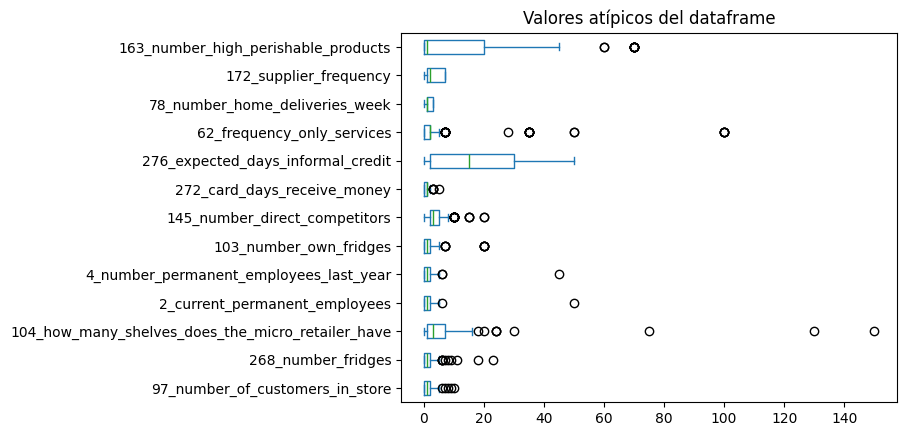

In [74]:
fig=plt.figure(figsize=(15,8))
cuanti.plot(kind='box',vert=False)
plt.title("Valores atípicos del dataframe")
plt.show() #Dibujamos el diagrama

In [75]:
cuanti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 13 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   97_number_of_customers_in_store                    171 non-null    float64
 1   268_number_fridges                                 171 non-null    float64
 2   104_how_many_shelves_does_the_micro_retailer_have  171 non-null    float64
 3   2_current_permanent_employees                      171 non-null    float64
 4   4_number_permanent_employees_last_year             171 non-null    float64
 5   103_number_own_fridges                             171 non-null    float64
 6   145_number_direct_competitors                      171 non-null    float64
 7   272_card_days_receive_money                        171 non-null    float64
 8   276_expected_days_informal_credit                  171 non-null    float64
 9   62_frequen

In [76]:
y=cuanti
ls=y.mean() + 3*y.std()
li=y.mean() - 3*y.std()
print("Límite Superior Permitido", ls)
print("Límite Inferior Permitido", li)

Límite Superior Permitido 97_number_of_customers_in_store                       6.591777
268_number_fridges                                   10.226491
104_how_many_shelves_does_the_micro_retailer_have    55.812917
2_current_permanent_employees                        13.620325
4_number_permanent_employees_last_year               12.375106
103_number_own_fridges                               12.195584
145_number_direct_competitors                        14.662575
272_card_days_receive_money                           2.778488
276_expected_days_informal_credit                    59.142586
62_frequency_only_services                           62.552780
78_number_home_deliveries_week                        4.935343
172_supplier_frequency                               10.717328
163_number_high_perishable_products                  64.124222
dtype: float64
Límite Inferior Permitido 97_number_of_customers_in_store                      -3.808151
268_number_fridges                                 

In [77]:
mr3=cuanti[(y<=ls)&(y>=li)]
mr3

,97_number_of_customers_in_store,268_number_fridges,104_how_many_shelves_does_the_micro_retailer_have,2_current_permanent_employees,4_number_permanent_employees_last_year,103_number_own_fridges,145_number_direct_competitors,272_card_days_receive_money,276_expected_days_informal_credit,62_frequency_only_services,78_number_home_deliveries_week,172_supplier_frequency,163_number_high_perishable_products
0,2.0,0.0,4.0,2.0,2.0,1.0,3.0,0.0,10.0,2.0,3.0,7.0,0.0
1,0.0,4.0,8.0,1.0,1.0,1.0,4.0,0.0,10.0,2.0,3.0,7.0,60.0
2,0.0,0.0,24.0,2.0,2.0,1.0,0.0,0.0,10.0,2.0,3.0,7.0,60.0
3,0.0,0.0,2.0,1.0,1.0,1.0,4.0,0.0,15.0,2.0,3.0,7.0,0.0
4,0.0,0.0,16.0,0.0,0.0,1.0,0.0,1.0,15.0,2.0,3.0,7.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,1.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
167,1.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
168,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
169,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [78]:
vn=mr3.isnull().sum()
vn

97_number_of_customers_in_store                      4
268_number_fridges                                   3
104_how_many_shelves_does_the_micro_retailer_have    3
2_current_permanent_employees                        1
4_number_permanent_employees_last_year               1
103_number_own_fridges                               5
145_number_direct_competitors                        5
272_card_days_receive_money                          5
276_expected_days_informal_credit                    0
62_frequency_only_services                           5
78_number_home_deliveries_week                       0
172_supplier_frequency                               0
163_number_high_perishable_products                  9
dtype: int64

In [79]:
datac=mr3.copy()
datac=mr3.fillna(round(mr3.mean(),1))
datac

,97_number_of_customers_in_store,268_number_fridges,104_how_many_shelves_does_the_micro_retailer_have,2_current_permanent_employees,4_number_permanent_employees_last_year,103_number_own_fridges,145_number_direct_competitors,272_card_days_receive_money,276_expected_days_informal_credit,62_frequency_only_services,78_number_home_deliveries_week,172_supplier_frequency,163_number_high_perishable_products
0,2.0,0.0,4.0,2.0,2.0,1.0,3.0,0.0,10.0,2.0,3.0,7.0,0.0
1,0.0,4.0,8.0,1.0,1.0,1.0,4.0,0.0,10.0,2.0,3.0,7.0,60.0
2,0.0,0.0,24.0,2.0,2.0,1.0,0.0,0.0,10.0,2.0,3.0,7.0,60.0
3,0.0,0.0,2.0,1.0,1.0,1.0,4.0,0.0,15.0,2.0,3.0,7.0,0.0
4,0.0,0.0,16.0,0.0,0.0,1.0,0.0,1.0,15.0,2.0,3.0,7.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,1.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
167,1.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
168,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
169,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
vn=datac.isnull().sum()
vn

97_number_of_customers_in_store                      0
268_number_fridges                                   0
104_how_many_shelves_does_the_micro_retailer_have    0
2_current_permanent_employees                        0
4_number_permanent_employees_last_year               0
103_number_own_fridges                               0
145_number_direct_competitors                        0
272_card_days_receive_money                          0
276_expected_days_informal_credit                    0
62_frequency_only_services                           0
78_number_home_deliveries_week                       0
172_supplier_frequency                               0
163_number_high_perishable_products                  0
dtype: int64

In [83]:
	
# Unimos la columna 'cuantitativas' con el dataframe
Datos_limpios = pd.concat([datac, cuali], axis=1)
Datos_limpios

,97_number_of_customers_in_store,268_number_fridges,104_how_many_shelves_does_the_micro_retailer_have,2_current_permanent_employees,4_number_permanent_employees_last_year,103_number_own_fridges,145_number_direct_competitors,272_card_days_receive_money,276_expected_days_informal_credit,62_frequency_only_services,...,261_technology_organization,262_technology_serve_customers,263_technology_secure_sales,264_technology_budget,267_technology_investment_customer_preferences,234_willingness_participate_workshop,318_shopkeeper_name,319_shopkeepers_last_name,236_whatsapp,235_email
0,2.0,0.0,4.0,2.0,2.0,1.0,3.0,0.0,10.0,2.0,...,De acuerdo,De acuerdo,Ni de acuerdo ni en desacuerdo,En desacuerdo,En desacuerdo,no,Fernanda,Escobedo,2224524020.0,fer.escobedo.meneses@gmail.com
1,0.0,4.0,8.0,1.0,1.0,1.0,4.0,0.0,10.0,2.0,...,De acuerdo,De acuerdo,Ni de acuerdo ni en desacuerdo,En desacuerdo,En desacuerdo,no,Fernanda,Escobedo,2224524020.0,fer.escobedo.meneses@gmail.com
2,0.0,0.0,24.0,2.0,2.0,1.0,0.0,0.0,10.0,2.0,...,De acuerdo,De acuerdo,Ni de acuerdo ni en desacuerdo,En desacuerdo,En desacuerdo,no,Fernanda,Escobedo,2224524020.0,fer.escobedo.meneses@gmail.com
3,0.0,0.0,2.0,1.0,1.0,1.0,4.0,0.0,15.0,2.0,...,De acuerdo,De acuerdo,Ni de acuerdo ni en desacuerdo,En desacuerdo,En desacuerdo,no,Fernanda,Escobedo,2224524020.0,fer.escobedo.meneses@gmail.com
4,0.0,0.0,16.0,0.0,0.0,1.0,0.0,1.0,15.0,2.0,...,De acuerdo,De acuerdo,Ni de acuerdo ni en desacuerdo,En desacuerdo,En desacuerdo,no,Fernanda,Escobedo,2224524020.0,fer.escobedo.meneses@gmail.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,1.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
167,1.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
168,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
169,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
valores_nulos=Datos_limpios.isnull().sum()
valores_nulos

97_number_of_customers_in_store                      0
268_number_fridges                                   0
104_how_many_shelves_does_the_micro_retailer_have    0
2_current_permanent_employees                        0
4_number_permanent_employees_last_year               0
                                                    ..
234_willingness_participate_workshop                 0
318_shopkeeper_name                                  0
319_shopkeepers_last_name                            0
236_whatsapp                                         0
235_email                                            0
Length: 107, dtype: int64

In [100]:
#Convertir DataFrame a CSV
mr2.to_csv("mr2.csv")